In [38]:
pip install --upgrade pip setuptools

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.1/2.1 MB 6.7 MB/s eta 0:00:00
  Using cached setuptools-68.1.2-py3-none-any.whl (805 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [3]:
!pip install dlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=1628e95a80c262a030c0d58f035b5f56db990a6bb4c3e9e708ddeb82bf1b5535
  Stored in directory: c:\users\bilyi\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [8]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import numpy as np

In [28]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

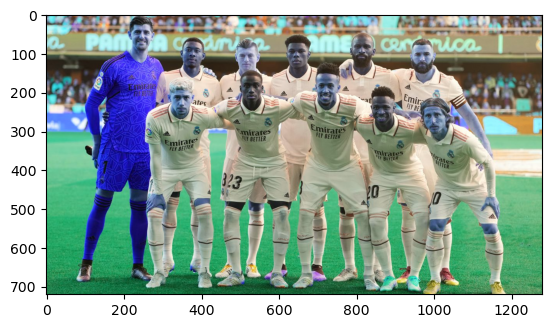

In [29]:
img = cv2.imread("photo.jpg")
plt.imshow(img)
plt.show()

## Детекція облич методом Віллі-Джонса

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
faces = face_cascade.detectMultiScale(gray,1.3, 5)

In [33]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 5)

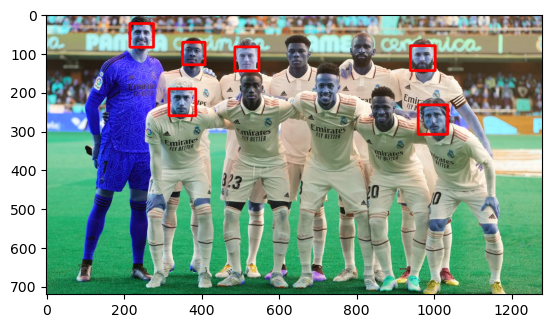

In [34]:
plt.imshow(img)
plt.show()

## Детекція облич методом HOG

In [9]:
gray = cv2.imread("photo.jpg", 0)
im = np.float32(gray) / 255.0

In [12]:
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx,gy,angleInDegrees=True)

In [13]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)

In [14]:
for (i, rect) in enumerate(rects):
    (x,y,w,h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray,(x,y),(x+w, y+h), (255,255,255),3)

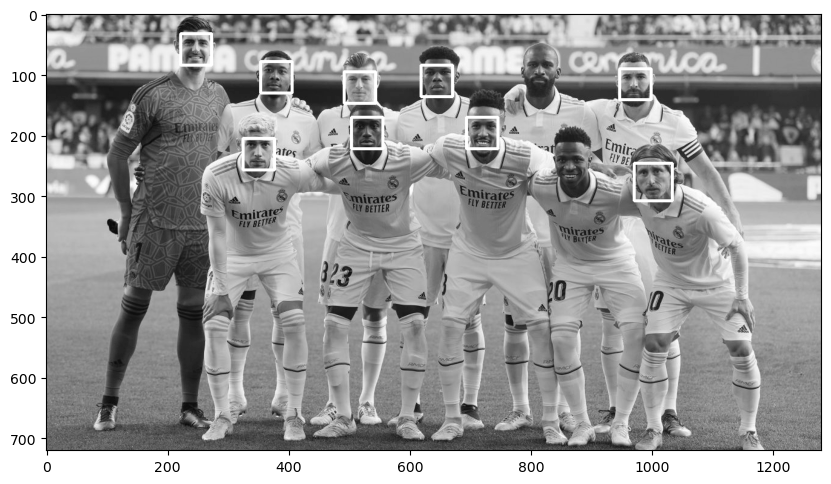

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(gray, cmap="gray")
plt.show()